In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.decomposition

In [3]:
df = pd.read_csv('../Data/B2/Iris.csv').iloc[:,:4]
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
# Cach 1: Dung SVD manual by numpy.linalg

In [4]:
u, s, vT = np.linalg.svd(df)

In [5]:
np.linalg.svd(df)

(array([[-6.16171172e-02,  1.29969428e-01, -5.58364155e-05, ...,
         -9.34637342e-02, -9.60224157e-02, -8.09922905e-02],
        [-5.80722977e-02,  1.11371452e-01,  6.84386629e-02, ...,
          3.66755322e-02, -3.24463474e-02,  1.27273399e-02],
        [-5.67633852e-02,  1.18294769e-01,  2.31062793e-03, ...,
          3.08252776e-02,  1.95234663e-01,  1.35567696e-01],
        ...,
        [-9.40702260e-02, -4.98348018e-02, -4.14958083e-02, ...,
          9.81822841e-01, -2.17978813e-02, -8.85972146e-03],
        [-9.48993908e-02, -5.62107520e-02, -2.12386574e-01, ...,
         -2.14264126e-02,  9.42038920e-01, -2.96933496e-02],
        [-8.84882764e-02, -5.16210172e-02, -9.51442925e-02, ...,
         -8.52768485e-03, -3.02139863e-02,  9.73577349e-01]]),
 array([95.95066751, 17.72295328,  3.46929666,  1.87891236]),
 array([[-0.75116805, -0.37978837, -0.51315094, -0.16787934],
        [ 0.28583096,  0.54488976, -0.70889874, -0.34475845],
        [ 0.49942378, -0.67502499, -0.05471

In [6]:
n = 2

In [9]:
A_re_create_1 = u[:,:n] @ np.diag(s[:n]) @ vT[:n,:]
A_re_create_1[:10,:]

array([[5.09945346, 3.50050812, 1.40094556, 0.19840569],
       [4.74974728, 3.19172985, 1.46006954, 0.25494146],
       [4.69047924, 3.2108907 , 1.30863935, 0.1915549 ],
       [4.61834831, 3.08439659, 1.46266616, 0.26731753],
       [5.07896131, 3.5005194 , 1.36352353, 0.18323972],
       [5.5300156 , 3.7270409 , 1.67511126, 0.28560814],
       [4.73513024, 3.22346842, 1.36171979, 0.21173807],
       [5.0090388 , 3.3931523 , 1.47838624, 0.24111369],
       [4.38266777, 2.92709982, 1.38778914, 0.25356965],
       [4.80937785, 3.22911564, 1.48446275, 0.26088223]])

In [30]:
species = pd.read_csv('../Data/B2/Iris.csv')['species']
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [32]:
T = pd.DataFrame(u[:,:n] @ np.diag(s[:n]), columns=['1st Component', '2nd Component'])
T['Species'] = species
T


,1st Component,2nd Component,Species
0,-5.912204,2.303442,setosa
1,-5.572076,1.973831,setosa
2,-5.446485,2.096533,setosa
3,-5.436019,1.871681,setosa
4,-5.875066,2.329348,setosa
...,...,...,...
145,-9.226698,-0.929481,virginica
146,-8.566555,-1.036575,virginica
147,-9.026101,-0.883220,virginica
148,-9.105660,-0.996221,virginica


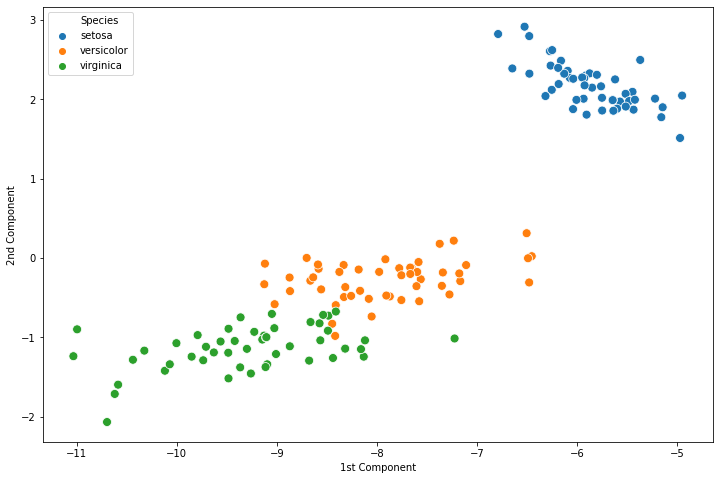

In [50]:
plt.figure(figsize=(12,8))
sb.scatterplot(data=T, x='1st Component', y='2nd Component', hue='Species',s=80);

In [55]:
# Cach 2: Dung Truncated SVD cua Sklean lib

In [56]:
svd = sklearn.decomposition.TruncatedSVD(n_components=2)
svd.fit(df)

TruncatedSVD()

In [65]:
Principal_component = svd.transform(df)

In [66]:
T_by_sklearn = pd.DataFrame(Principal_component, columns=['1st Component', '2nd Component'])
T_by_sklearn['Species'] = species
T_by_sklearn

,1st Component,2nd Component,Species
0,5.912204,2.303442,setosa
1,5.572076,1.973831,setosa
2,5.446485,2.096533,setosa
3,5.436019,1.871681,setosa
4,5.875066,2.329348,setosa
...,...,...,...
145,9.226698,-0.929481,virginica
146,8.566555,-1.036575,virginica
147,9.026101,-0.883220,virginica
148,9.105660,-0.996221,virginica


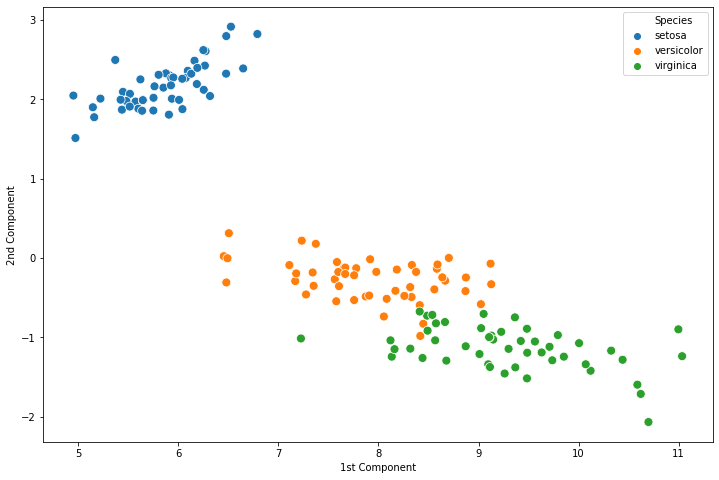

In [61]:
plt.figure(figsize=(12,8))
sb.scatterplot(data=T_by_sklearn, x='1st Component', y='2nd Component', hue='Species',s=80);

In [71]:
A = svd.inverse_transform(Principal_component)
A[:10,:]

array([[5.09945346, 3.50050812, 1.40094556, 0.19840569],
       [4.74974728, 3.19172985, 1.46006954, 0.25494146],
       [4.69047924, 3.2108907 , 1.30863935, 0.1915549 ],
       [4.61834831, 3.08439659, 1.46266616, 0.26731753],
       [5.07896131, 3.5005194 , 1.36352353, 0.18323972],
       [5.5300156 , 3.7270409 , 1.67511126, 0.28560814],
       [4.73513024, 3.22346842, 1.36171979, 0.21173807],
       [5.0090388 , 3.3931523 , 1.47838624, 0.24111369],
       [4.38266777, 2.92709982, 1.38778914, 0.25356965],
       [4.80937785, 3.22911564, 1.48446275, 0.26088223]])

In [72]:
np.allclose(A, A_re_create_1)

True